In [ ]:

###############################################
# Load a few helpful modules
import torch
print(f'Using PyTorch v{torch.__version__}')
###############################################
import pandas as pd
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset 
###############################################

def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device
device = get_device() 
print( device ) 


In [5]:
import numpy as np
import matplotlib.pylab as plt 
import sys
sys.path.insert(1, '/bettik/boudaose/FINAL_SCRIPTS/') 
import USED_FUNCTIONS_2 as uf


In [6]:
####################################################################
#LColors = [1, 2, 3, 12, 18, 20, 21, 23, 24, 25, 26, 27, 29, 32, 40] 
LColors = [ 1, 12, 18, 23, 24, 26 ] # Studied colors 
Ch = 3     # Number of channels
pathrepo = f"/home/boudaose/23_mai/Chambery/"   # path of the dataset 
#pathrepo = f"/home/boudaose/23_mai/Grenoble/"  # path of the dataset 
n = 4000   # number of maximal items/label

####################################################################

L_nan  = [] 
LCo    = [] 
Llen   = [] 
scount = 0 
for col in LColors : 
    LlenLoc = 0
    for i in range( n ) : 
        # Load the TopLeft list 
        try :
            color, Pxl = col , i
            title = str(f'Color {color}, Pixel {Pxl}, On {60} dates').replace(' ','_') 
            filename = f"{pathrepo}Label_{color}/Coherence_{color}/"+f'Coherence_Matrix_{title}.mat' 
            with open( filename, 'rb') as f:
                Matr = np.load(f) 
            if ( np.isnan( np.sum(Matr) )) : 
                L_nan.append( i ) 
            #else : 
            scount += 1
            LCo.append( col ) 
            LlenLoc += 1
        except :
            break
    Llen.append( LlenLoc )

print( "NbDataGlobal :", scount , 
 "\n", "LCo          :", list(set(LCo)), 
 "\n", "NbDataLocal  :", Llen, 
 "\n", "Lnan         :", L_nan ) 
#-----------------------------------------------------------------
# on the whole matrix
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
Donnees = np.zeros( ( sum(Llen), Matr.shape[0], Matr.shape[1], Ch ) ) 
Legends = []
coords = []
s = 0 
for clr in LColors : 
    #-------------------------------
    # Coordinates of the patches 
    filename = f"{pathrepo}Label_{clr}/Coordinates_XY_{clr}"
    with open( filename, 'rb') as f:
        a = np.load(f) 
    #-------------------------------
    compt = 0
    print("Color :", clr, "Shape :", a.shape)
    for d in range( n ) : 
        try :
            if (d in L_nan) : 
                pass
            else :
                # Load the TopLeft list
                color, Pxl = clr , d 
                title = str(f'Color {color}, Pixel {Pxl}, On {60} dates').replace(' ','_') 
                #-------------------------------
                # Here comment or decomment the wanted channels
                filename = f"{pathrepo}Label_{color}/Coherence_{color}/"+f'Coherence_Matrix_{title}.mat' 
                with open( filename, 'rb') as f:
                    Matr = np.load(f) 
                Donnees[ s ,:,:, 0] = Matr 
                #-------------------------------
                filename = f"{pathrepo}Label_{color}/Coherence_{color}/"+f'Covariance_Matrix_{title}.mat' 
                with open( filename, 'rb') as f:
                    Matr = np.load(f) 
                Donnees[ s ,:,:, 1] = Matr 
                #-------------------------------
                filename = f"{pathrepo}Label_{color}/Coherence_{color}/"+f'CovarianceA_Matrix_{title}.mat' 
                with open( filename, 'rb') as f:
                    Matr = np.load(f) 
                Donnees[ s ,:,:, 2] = Matr 
                #-------------------------------
                """
                filename = f"{pathrepo}Label_{color}/Coherence_{color}/"+f'Correlation_Matrix_{title}.mat' 
                with open( filename, 'rb') as f:
                    Matr = np.load(f) 
                Donnees[ s ,:,:, 3] = Matr 
                #-------------------------------
                filename = f"{pathrepo}Label_{color}/Coherence_{color}/"+f'StackAmp_{title}.mat' 
                with open( filename, 'rb') as f:
                    Matr = np.load(f) 
                Sz = Donnees[ s ,:,:, 0].shape[1]
                block1 = np.zeros( [Sz,Sz] ) 
                block2 = np.log(Matr) 
                block1[0:0+block2.shape[0],0:0+block2.shape[1]] += block2 
                Donnees[ s ,:,:, 4] = block1
                #-------------------------------
                filename = f"{pathrepo}Label_{color}/Coherence_{color}/"+f'StackPhz_{title}.mat' 
                with open( filename, 'rb') as f:
                    Matr = np.load(f) 
                block1 = np.zeros( [Sz,Sz] ) 
                block2 = Matr
                block1[0:0+block2.shape[0],0:0+block2.shape[1]] += block2 
                Donnees[ s ,:,:, 5] = block1 
                """
                ################################
                coords.append( a[compt] )
                #-------------------------------
                indx = LColors.index(color) 
                Legends.append( indx ) 
                s+=1
            compt+=1 # Count 'nan' and 'non-nan' 
        except : 
            break 
#-----------------------------------------------------------------
print(len(Legends)) 
#-----------------------------------------------------------------

NbDataGlobal : 14382 
 LCo          : [1, 12, 18, 23, 24, 26] 
 NbDataLocal  : [254, 1575, 4000, 4000, 4000, 553] 
 Lnan         : []
Color : 1 Shape : (254, 2)
Color : 12 Shape : (1575, 2)
Color : 18 Shape : (6000, 2)
Color : 23 Shape : (6000, 2)
Color : 24 Shape : (6000, 2)
Color : 26 Shape : (553, 2)
14382
CPU times: user 14 s, sys: 3.52 s, total: 17.5 s
Wall time: 1min 38s


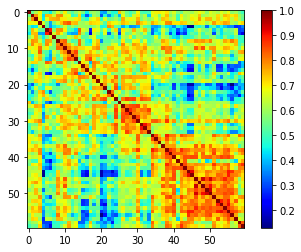

In [9]:

color, Pxl = 1 , 10
title = str(f'Color {color}, Pixel {Pxl}, On {60} dates').replace(' ','_') 
filename = f"{pathrepo}Label_{color}/Coherence_{color}/"+f'Coherence_Matrix_{title}.mat' 
with open( filename, 'rb') as f:
    Matr = np.load(f) 
plt.imshow( Matr, cmap='jet' ) 
plt.colorbar() 
plt.show() 
plt.pause(5)
plt.close() 

In [10]:
print("Colors are : ", LColors)

Colors are :  [1, 12, 18, 23, 24, 26]


In [12]:
print( "Total number of labels is :", len(coords) ) 

Total number of labels is : 14382


In [16]:
# An example of the future 'Ch' channels
for c in range(Ch) : 
    print( Donnees[0,:,:,c], "\n\n\n", ) 


[[1.         0.76114562 0.75667562 ... 0.83917089 0.80818949 0.81893136]
 [0.76114562 1.         0.69398985 ... 0.68846613 0.74949399 0.7162342 ]
 [0.75667562 0.69398985 1.         ... 0.77714198 0.80560186 0.7604466 ]
 ...
 [0.83917089 0.68846613 0.77714198 ... 1.         0.837414   0.82610284]
 [0.80818949 0.74949399 0.80560186 ... 0.837414   1.         0.84269049]
 [0.81893136 0.7162342  0.7604466  ... 0.82610284 0.84269049 1.        ]] 



[[23631.01952043 15787.99117019 16536.82501286 ... 21674.28069191
  20619.65118153 22556.40351733]
 [15787.99117019 18206.89093718 13312.8847739  ... 15608.22533176
  16784.67492819 17316.25905367]
 [16536.82501286 13312.8847739  20211.67546418 ... 18563.27409726
  19008.52863868 19370.95364356]
 ...
 [21674.28069191 15608.22533176 18563.27409726 ... 28229.68959631
  23351.78869166 24869.57079206]
 [20619.65118153 16784.67492819 19008.52863868 ... 23351.78869166
  27545.69724173 25059.71345922]
 [22556.40351733 17316.25905367 19370.95364356 ... 2

In [18]:
# Mean and Std of the 3 channels (useful for the normalization)
for c in range(Ch) : 
    print( f"Mean of Channel {c} : " , Donnees[:,:,:,c].mean(), 
           f"Std  of Channel {c} : " , Donnees[:,:,:,c].std() ) 

Mean of Channel 0 :  0.26685050660248766 Std  of Channel 0 :  0.17061233162498401
Mean of Channel 1 :  3202.549868099406 Std  of Channel 1 :  14263.18261842138
Mean of Channel 2 :  618.7665525319877 Std  of Channel 2 :  7867.89668596845


The set of actual present labels :  {0, 1, 2, 3, 4, 5}


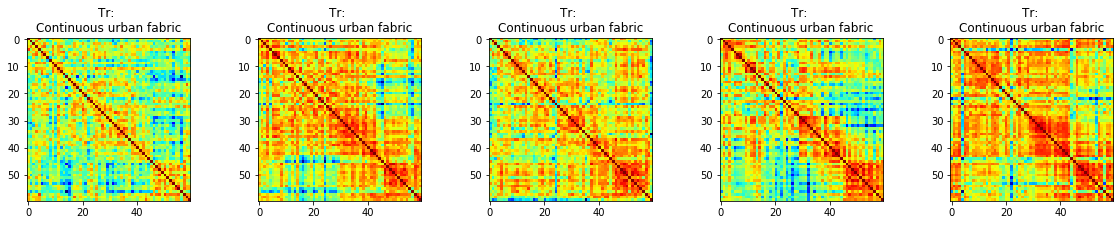

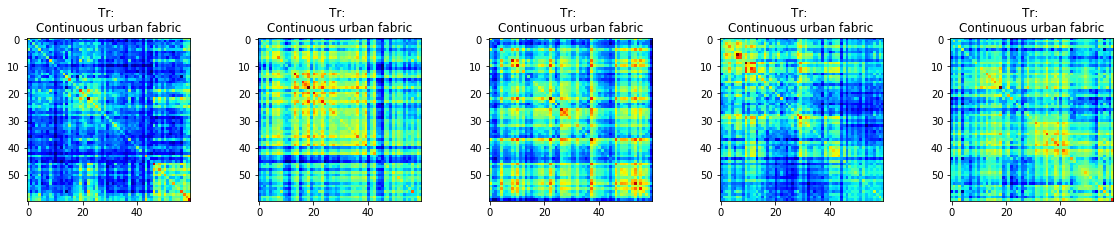

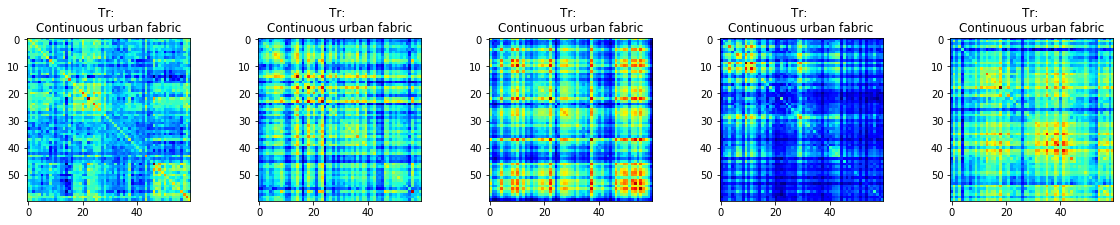

In [24]:
# Examples of 'figures' from the 3 matrices
The_Images = Donnees 

print("The set of actual present labels : ", set(Legends)) 
for c in range(Ch) : 
    #---------------------------------------------------------------
    _, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 3) ) 
    for ax, image, label in zip(axes, The_Images[:,:,:,c], Legends ) : 
    #for ax, image, label in zip(axes, The_Images[:,:,:], Legends ) : 
        #ax.set_axis_off() 
        ax.imshow(image, cmap="jet", interpolation='nearest') 
        #ax.set_title('Training: %i' % label) 
        ax.set_title('Tr: \n%s' % uf.LabelsList()[LColors[label]] ) 
        
    #---------------------------------------------------------------


In [26]:
# Splitting the dataset between Train & Test (validset)
#---------------------------------------------------------------
if len(L_nan)!=0 : 
    The_Images = Donnees[:-len(LColors)*len(L_nan)] 
    #Legends = Legends[:-len(LColors)*len(L_nan)]

print(The_Images.shape, len(Legends) )
#---------------------------------------------------------------
N_SAMPLES = len( The_Images ) 
DATA = The_Images.reshape(( N_SAMPLES, -1 ), order='F') 
#DATA = The_Images 
#---------------------------------------------------------------
X_TRAIN, X_TEST, y_TRAIN, y_TEST = train_test_split( DATA, 
                                                    Legends,
                                                    test_size=0.30 , 
                                                    shuffle=True ) 
#---------------------------------------------------------------
Legends = np.array(Legends[:]) 
print(Legends) 
print(X_TRAIN.shape, np.array(y_TRAIN).shape) 
#---------------------------------------------------------------

(14382, 60, 60, 3) 14382
[0 0 0 ... 5 5 5]
(10067, 10800) (10067,)


In [36]:
Means = [] 
Stds  = [] 
for c in range(Ch) : 
    Means.append( Donnees[:,:,:,c].mean() ) 
    Stds.append( Donnees[:,:,:,c].std() ) 
Means[0] = .5 # 0.5 to normalize [0->1] coherence values 
Stds[0]  = .5 # 0.5 to normalize [0->1] coherence values 

In [38]:
print(Means)
print(Stds)

[0.5, 3202.549868099406, 618.7665525319877]
[0.5, 14263.18261842138, 7867.89668596845]


In [39]:
# define transforms
# Construct the transform
import torchvision.transforms as transforms
from   PIL import Image

transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean= Means, 
                             std = Stds 
                            )  ]) 

In [41]:
# Custom dataset
class MNISTDataset(Dataset): 
    def __init__(self, images, labels=None, transforms=None): 
        self.X = images 
        self.y = labels 
        self.transforms = transforms 
         
    def __len__(self):
        return (len(self.X)) 
    
    def __getitem__(self, i):
        data = np.array(self.X[i, :]) 
        data = np.asarray(data).astype(np.float32).reshape((60, 60, int(Ch)),order='F') 
        if self.transforms:
            data = self.transforms(data).type('torch.FloatTensor') 
        if self.y is not None:
            return (data, self.y[i]) 
        else:
            return data 
        

In [42]:
train_data  = MNISTDataset(X_TRAIN, y_TRAIN , transform)
test_data   = MNISTDataset(X_TEST, y_TEST   , transform)


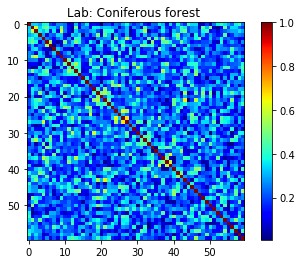

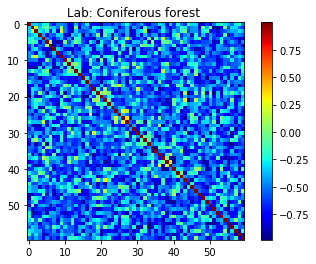

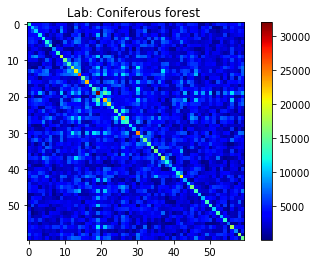

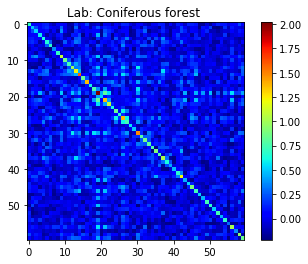

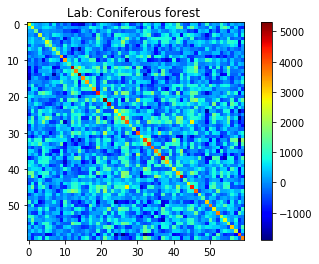

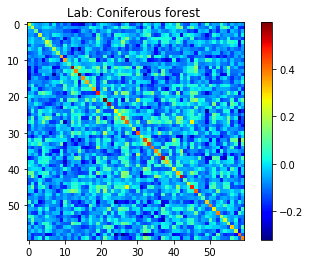

In [46]:
# Testing that data is intact
i = 10
for c in range(Ch) : 
    plt.imshow( X_TRAIN[i,:].reshape(Ch,60,60)[c] , cmap='jet') 
    plt.title( f"Lab: { uf.LabelsList()[ LColors[y_TRAIN[i]] ] } " )
    plt.colorbar() 
    plt.show() 
    plt.imshow( train_data[i][0][c] , cmap='jet') 
    plt.title( f"Lab: { uf.LabelsList()[ LColors[train_data[i][1]]] } " )
    plt.colorbar() 
    plt.show() 
    plt.pause(5)
    plt.close() 


In [48]:
# The 3 colors in one tensor
print("Shape of the tensors :", train_data[0][0].shape) 

Shape of the tensors : torch.Size([3, 60, 60])


In [49]:
# Number of processes
Num_workers = 20*2      # Number of subprocesses to use for data loading (2*Used_cpus)
Batch_SIZE  = 64        # Size of the batch per epoch

train_loader = DataLoader( train_data, batch_size=Batch_SIZE, shuffle=True , num_workers=Num_workers ) 
valid_loader = DataLoader( test_data , batch_size=Batch_SIZE, shuffle=True, num_workers=Num_workers ) 


In [50]:
# Test the size and shape of the output 
dataiter = iter(train_loader) 
images, labels = dataiter.next() 
print("Class : ", type(images)) 
print("New 'data'  shape : ", images.shape) 
print("New 'label' shape : ", labels.shape) 


Class :  <class 'torch.Tensor'>
New 'data'  shape :  torch.Size([64, 3, 60, 60])
New 'label' shape :  torch.Size([64])


In [52]:
import os 
import sys 
sys.path.append(".") 
import torch.nn as nn

# We import the network we use 
#################################################################
#from saved_net_1   import Net   # 1 channel
#from saved_net_3CH import Net  # 3 channel
from saved_net_3CHBNso60 import Net   # 3 channel (with BatchNorm)

# Load the CNNet
model = Net().to(device) 
# show the archit
print( model ) 


14400
Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Dropout(p=0.25)
  )
  (fc_layers):

In [ ]:
#################################################################
#                        TRAINING STEP
#################################################################

In [53]:
# We name the model to save after the date time
from datetime import datetime 
# datetime object containing current date and time 
now = datetime.now() 
fileN = f"{ str(str(now)[:16].replace('-','_')).replace(':','-').replace(' ','_') }" 
print( fileN ) 


2021_08_05_08-39


In [54]:

import torch.optim as optim
# specify loss function
criterion = nn.CrossEntropyLoss()

valid_loss_min = np.Inf # track change in validation loss
################################################
# Get the device
print(device)
model.to(device)
tLoss, vLoss = [], [] 
################################################


cpu


In [55]:
# number of epochs to train the model
n_epochs = 2*20   # you may increase this number to train a final model 

In [56]:
# We can decrease LR every X epochs
def LearnRate( epoch ) :
    #----------------------------------------------
    import numpy as np 
    StepsLR = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])*20 # every 20
    #----------------------------------------------
    x=0
    if (epoch>=0) :
        x=0.002
    if (epoch>StepsLR[0]) :
        x=0.001
    if (epoch>StepsLR[1]) :
        x=0.0005
    if (epoch>StepsLR[2]) :
        x=0.00025
    if (epoch>StepsLR[3]) :
        x=0.000125
    if (epoch>StepsLR[4]) :
        x=0.00006
    if (epoch>StepsLR[5]) :
        x=0.00003
    return x


Using matplotlib backend: TkAgg
Learning Rate: 0.002
Epoch: 0 	Training Loss: 2.348035 	Validation Loss: 0.930607
--------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.930607).  Saving model ...
********************************************************************************
Learning Rate: 0.002
Epoch: 1 	Training Loss: 1.086727 	Validation Loss: 0.767216
--------------------------------------------------------------------------------
Validation loss decreased (0.930607 --> 0.767216).  Saving model ...
********************************************************************************
Learning Rate: 0.002
Epoch: 2 	Training Loss: 0.886458 	Validation Loss: 0.802410
--------------------------------------------------------------------------------
Learning Rate: 0.002
Epoch: 3 	Training Loss: 0.833380 	Validation Loss: 0.861130
--------------------------------------------------------------------------------
Learning Rate: 0.002


CPU times: user 5h 34min 13s, sys: 21min 34s, total: 5h 55min 48s
Wall time: 42min 15s


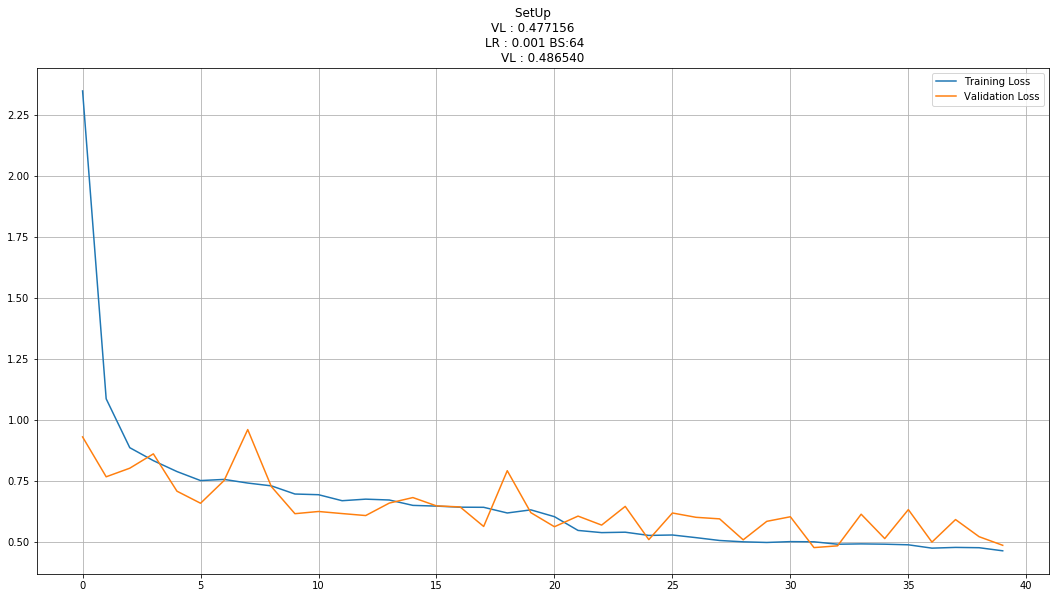

In [57]:
%%time
%matplotlib auto

for epoch in range(n_epochs):
    LR = LearnRate( epoch ) 
    print( "Learning Rate:", LR )
    optimizer = optim.Adam(model.parameters(), lr=LR ) 
    #---------------------------------------------------------------------------------
    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    #########
    # train #
    #########
    model.train() 
    for data, target in train_loader : 
        #data, target = data.double(), target.double()
        # move tensors to GPU if CUDA is available 
        data   = data.to(device) 
        target = target.to(device) 
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)     
    ############
    # validate #
    ############
    model.eval() 
    for data, target in valid_loader : 
        # move tensors to GPU if CUDA is available 
        data   = data.to(device) 
        target = target.to(device) 
        # forward pass: compute predicted outputs by passing inputs to the model 
        output = model(data) 
        # calculate the batch loss 
        loss = criterion(output, target) 
        # update average validation loss 
        valid_loss += loss.item()*data.size(0) 
    ################
    # calculate average losses 
    train_loss = train_loss/len(train_loader.dataset) 
    valid_loss = valid_loss/len(valid_loader.dataset) 
    tLoss.append(train_loss) 
    vLoss.append(valid_loss) 

    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss)) 
    print(80*"-") 
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min: 
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss)) 
        torch.save(model.state_dict(), f"cnn_{fileN}_{Ch}C.pt" ) 
        valid_loss_min = valid_loss 
        print(80*"*")

    # Plot the resulting loss over time
    plt.cla() 
    plt.plot(tLoss, label='Training Loss')
    plt.plot(vLoss, label='Validation Loss')
    plt.title( f'SetUp \
    \nVL : {str(min(vLoss))[:8]} \
    \nLR : {LR} BS:{Batch_SIZE}\
    \nVL : {str(vLoss[-1])[:8]}' ) 
    plt.legend() 
    plt.grid() 
    plt.pause(0.001) 
    plt.show() 


In [61]:
#################################################################
#                      END OF TRAINING STEP
#################################################################

In [62]:
####################################################################
# One may start from here (and ignore training steps) if 
# we wanted to try a preexistant model (to be loaded)
####################################################################
#model.load_state_dict(torch.load( f"cnn_2021_07_29_05-50_3C.pt" )); 
#model.load_state_dict(torch.load( f"cnn_2021_07_28_08-11_6C.pt" )); 
model.load_state_dict(torch.load( f"cnn_{fileN}_{Ch}C.pt" )); 

nc = len(LColors) # Number of Classes
# track test loss
test_loss     = 0.0
class_correct = [0]*nc
class_total   = [0]*nc

model.eval()

# For generating confusion matrix
#conf_matrix = np.zeros((10,10))
conf_matrix = np.zeros((nc,nc))

# iterate over test data
for data, target in valid_loader:
    # move tensors to GPU if CUDA is available
    data   = data.to(device)
    target = target.to(device)
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if device == "cpu" else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(target.size(0)):
        label = target.data[i]
        #print( label , '\n', target.size(0) )
        class_correct[label] += correct[i].item()
        class_total[label] += 1
        
        # Update confusion matrix
        conf_matrix[label][pred.data[i]] += 1

# average test loss
test_loss = test_loss/len(valid_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(nc):
    if class_total[i] > 0:
        print('Test Accuracy of %3s: %2d%% (%2d/%2d)' % (
            i, 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %3s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total))) 


Test Loss: 0.456169

Test Accuracy of   0: 84% (61/72)
Test Accuracy of   1: 83% (371/446)
Test Accuracy of   2: 82% (989/1204)
Test Accuracy of   3: 89% (1073/1199)
Test Accuracy of   4: 93% (1153/1235)
Test Accuracy of   5: 16% (26/159)

Test Accuracy (Overall): 85% (3673/4315)


Classes : ['Continuous urban fabric', 'Non-irrigated arable land', 'Pastures', 'Broad-leaved forest', 'Coniferous forest', 'Natural grasslands'] 

C1
Confusion matrix, without normalization
[[5.60e+01 1.00e+00 7.00e+00 1.00e+00 0.00e+00 0.00e+00]
 [2.00e+00 3.80e+02 7.00e+01 1.20e+01 1.00e+00 0.00e+00]
 [1.00e+01 5.20e+01 9.78e+02 1.01e+02 7.00e+01 1.90e+01]
 [1.00e+00 0.00e+00 1.14e+02 1.07e+03 2.00e+01 3.00e+00]
 [0.00e+00 0.00e+00 4.10e+01 4.90e+01 1.09e+03 3.00e+00]
 [0.00e+00 1.00e+00 6.70e+01 2.80e+01 3.50e+01 3.60e+01]]
C1 
Normalized confusion matrix
[[8.62e-01 1.54e-02 1.08e-01 1.54e-02 0.00e+00 0.00e+00]
 [4.30e-03 8.17e-01 1.51e-01 2.58e-02 2.15e-03 0.00e+00]
 [8.13e-03 4.23e-02 7.95e-01 8.21e-02 5.69e-02 1.54e-02]
 [8.28e-04 0.00e+00 9.44e-02 8.86e-01 1.66e-02 2.48e-03]
 [0.00e+00 0.00e+00 3.47e-02 4.15e-02 9.21e-01 2.54e-03]
 [0.00e+00 5.99e-03 4.01e-01 1.68e-01 2.10e-01 2.16e-01]]


<Figure size 432x288 with 0 Axes>

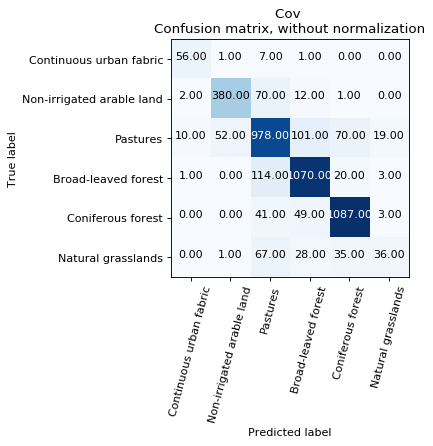

<Figure size 432x288 with 0 Axes>

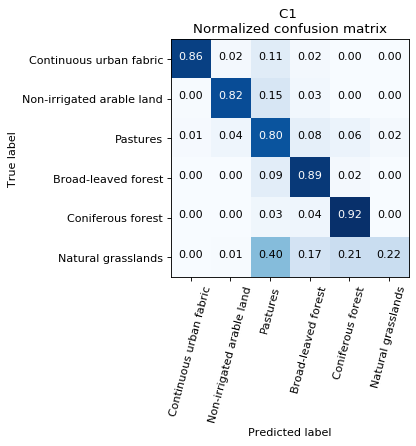

In [59]:
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

# Compute confusion matrix
np.set_printoptions(precision=2)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("C1 \nNormalized confusion matrix")
    else:
        print('C1\nConfusion matrix, without normalization') 
    print(cm) 
    
    size = 5.5
    from matplotlib.pyplot import figure ; 
    figsize = size
    
    figure(facecolor=(1,1,1), num=None,
           figsize=(figsize, figsize ), 
           dpi=80, )

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar() 
    #plt.colorbar(  fraction=0.035, pad=0.01 ) 
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75)
    plt.yticks(tick_marks, classes)

    #fmt = '.2f' if normalize else 'd' 
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#LColors  = [ 18, 23, 24, 26, 31 ] 
Clas     = []
for i in LColors  : 
    Clas.append( uf.LabelsList()[ i ] )

print("Classes :", Clas, '\n')

# Plot non-normalized confusion matrix
plt.figure() 
plot_confusion_matrix(conf_matrix, classes=Clas, title=f'Cov \nConfusion matrix, without normalization')

plt.show() 

#########################################################

#%%time

import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
################################################################## 
from sklearn.metrics import confusion_matrix 
np.set_printoptions(precision=2)

import itertools
# Plot normalized confusion matrix
plt.figure() 
plot_confusion_matrix(conf_matrix, 
                      classes=Clas, 
                      normalize=True,
                      title=f'C1 \nNormalized confusion matrix')
plt.show() 

#################################################################
